In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("july.csv")

In [4]:
df.head()

,Date,Country_Region,alpha-3_code,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
0,2020-01-22,Afghanistan,AFG,37172386,0,0,0,0,0,0,0
1,2020-01-22,Albania,ALB,2866376,0,0,0,0,0,0,0
2,2020-01-22,Algeria,DZA,42228429,0,0,0,0,0,0,0
3,2020-01-22,Andorra,AND,77006,0,0,0,0,0,0,0
4,2020-01-22,Angola,AGO,30809762,0,0,0,0,0,0,0


In [5]:
df.drop(columns = {"alpha-3_code"}, inplace =True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32524 entries, 0 to 32523
Data columns (total 10 columns):
Date                         32524 non-null object
Country_Region               32524 non-null object
Population                   32524 non-null int64
Total_Confirmed_Cases        32524 non-null int64
Total_Fatalities             32524 non-null int64
Total_Recovered_Cases        32524 non-null int64
New_Confirmed_Cases          32524 non-null int64
New_Fatalities               32524 non-null int64
New_Recovered_Cases          32524 non-null int64
Remaining_Confirmed_Cases    32524 non-null int64
dtypes: int64(8), object(2)
memory usage: 2.5+ MB


In [7]:
plt.style.use("ggplot")
%matplotlib notebook

In [34]:
tot =df.groupby("Date").sum()["Total_Confirmed_Cases"]

In [35]:
tot.shape[0]

173

In [23]:
tick_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul"]

In [20]:
import numpy as np

<IPython.core.display.Javascript object>


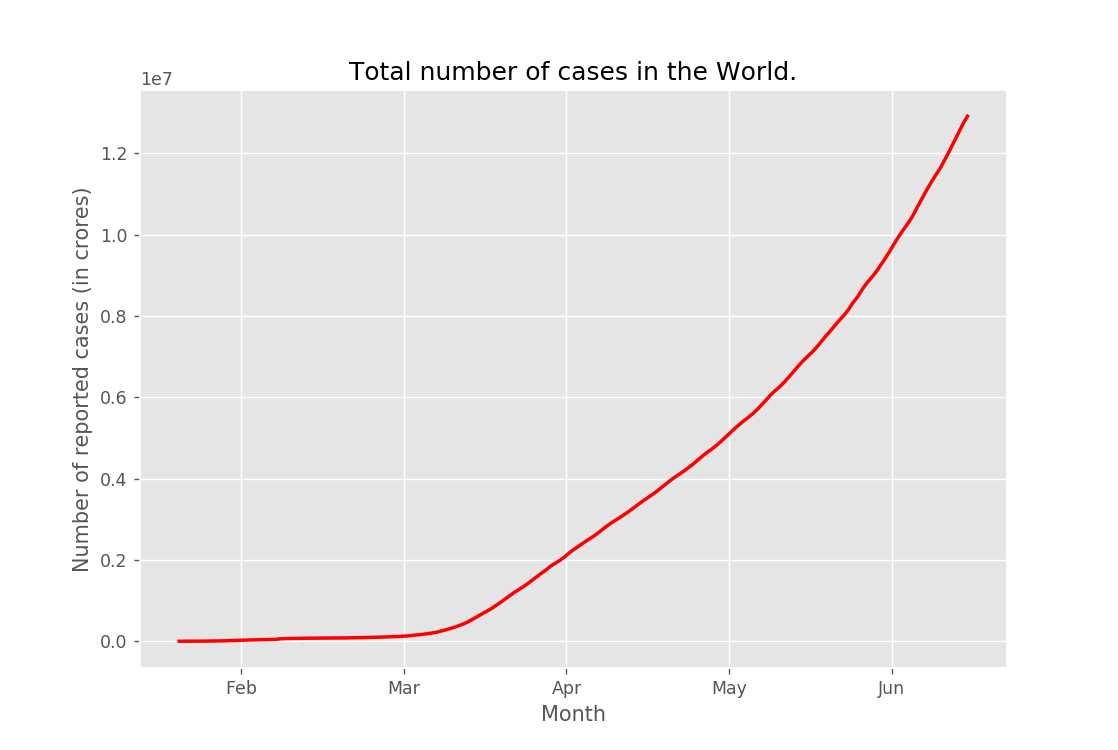

[]

In [39]:
plt.plot(tot.index, tot.values,color = 'red', linewidth = 2 )
plt.xticks(np.linspace(-22,tot.shape[0]+18,7),tick_labels)
plt.xlabel("Month")
plt.ylabel("Number of reported cases (in crores)")
plt.title("Total number of cases in the World.")
plt.plot()

### The total number of cases in the world started growing at an exponential rate from March,2020.The curved showed a little bend downwards after April, but cases again started expontially rising from May.

In [40]:
tot =df.groupby("Date").sum()["New_Confirmed_Cases"]

In [41]:
tot.shape[0]

173

In [43]:
tot.tail()

Date
2020-07-08    211878
2020-07-09    227038
2020-07-10    229949
2020-07-11    219441
2020-07-12    192449
Name: New_Confirmed_Cases, dtype: int64

<IPython.core.display.Javascript object>


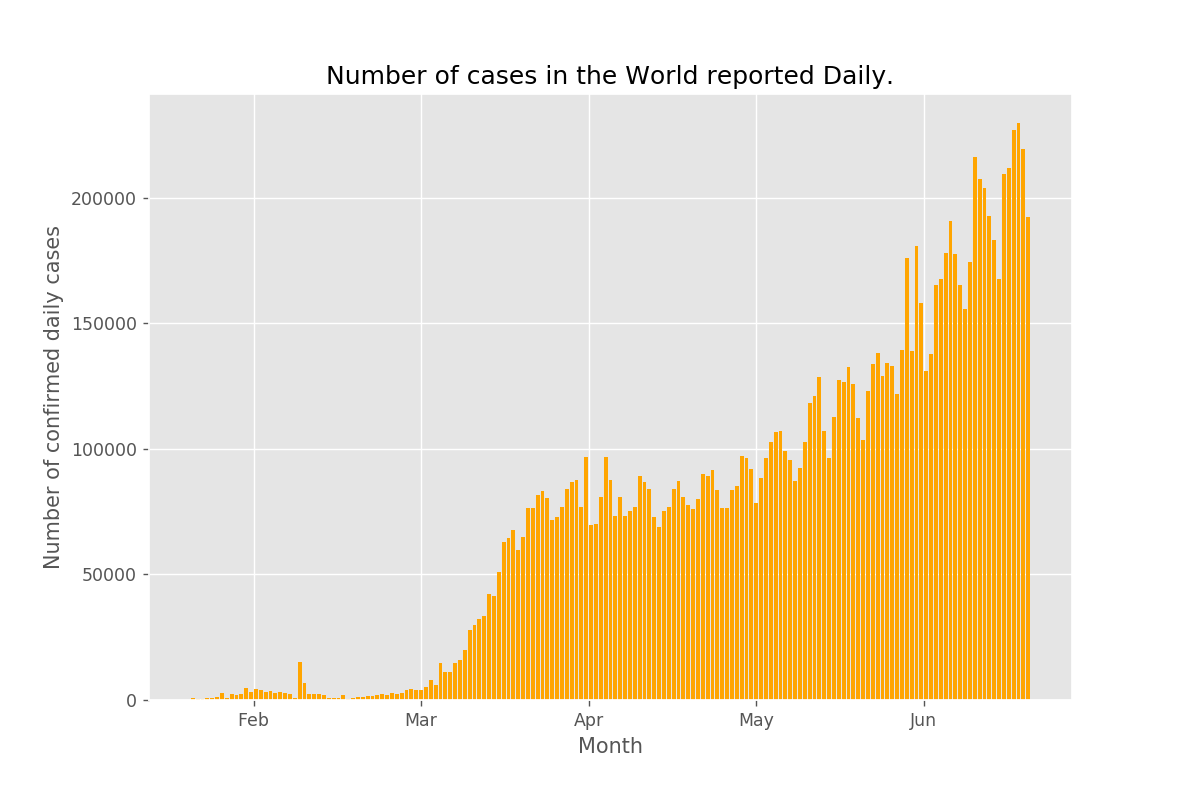

[]

In [61]:
plt.bar(tot.index, tot.values,color = 'orange')
plt.xticks(np.linspace(-22,tot.shape[0]+12,7),tick_labels)
plt.xlabel("Month")
plt.ylabel("Number of confirmed daily cases")
plt.title("Number of cases in the World reported Daily.")
plt.plot()

### At the end of February we have seen a sudden spike in daily confirmed cases due to reports comming from China. Coronavirus started spreading rapidly across the world in March end, due to which lockdown was declared in some countries. The lockdown was actually quite effective as the daily rise in cases was controlled to a great extent by some countries.
### By the end of May the daily cases again started rising rapidly in some other countries like America, and the daily cases rose to about 80,000 cases per day in May , about 150,000 cases per day by the end of June, and about 200,000 cases per day by the beginning of july.

In [50]:
death =df.groupby("Date").sum()["New_Fatalities"]

In [53]:
death.head()

Date
2020-01-22    17
2020-01-23     1
2020-01-24     8
2020-01-25    16
2020-01-26    14
Name: New_Fatalities, dtype: int64

<IPython.core.display.Javascript object>


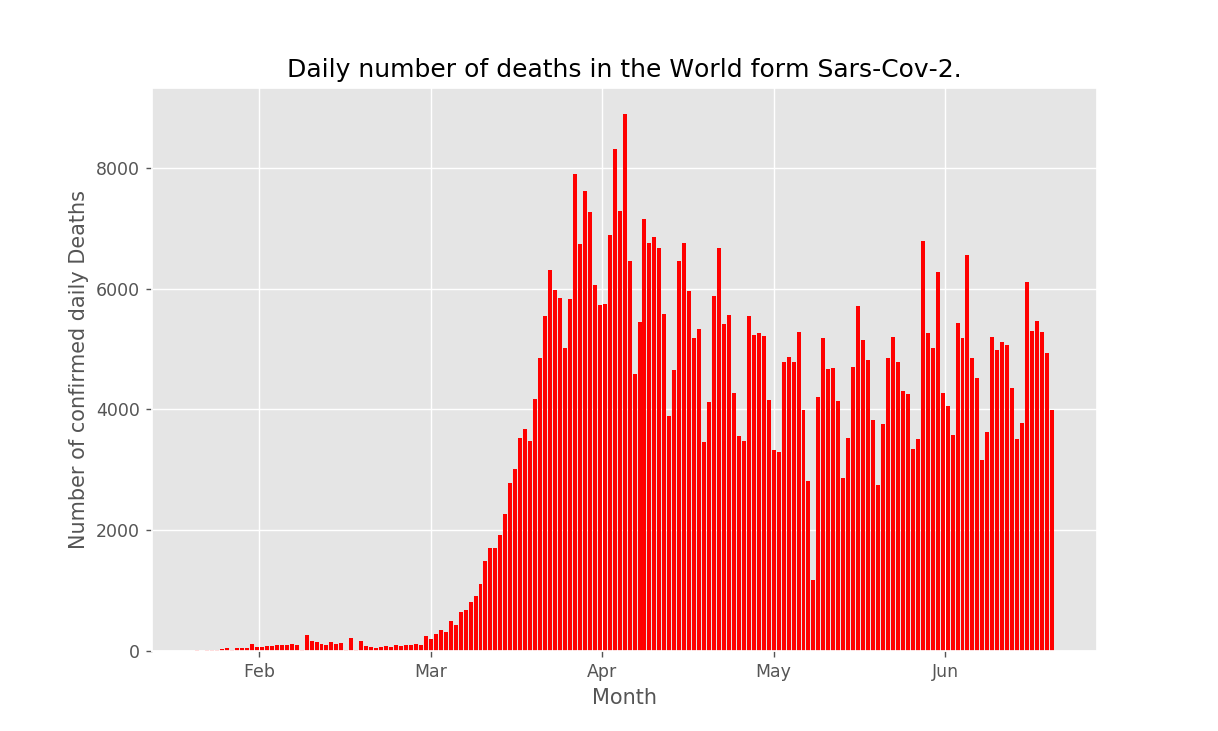

[]

In [62]:
plt.bar(death.index, death.values,color = 'red')
plt.xticks(np.linspace(-22,tot.shape[0]+12,7),tick_labels)
plt.xlabel("Month")
plt.ylabel("Number of confirmed daily Deaths")
plt.title("Daily number of deaths in the World form Sars-Cov-2.")
plt.plot()

### Deaths started rising rapidly from March when coronavirus started spreading rapidly across many countries. Most of these deaths were reported form european countries like UK, France and Italy. Number of daily deaths rose from about 150 in the beginning of March to a record high of above 8000 in April.
### It is also to be noted that, cases started rising rapidly, at an exponential rate form May(as seen from the previous analysis), but the daily reported deaths has almost remained constant in the months of May and June.This is because, in March and  April, most of the cases were reported in European countries(and USA), where the mortality rate was very high, especially in countries like Italy and France. But currently the pandemic has shifted to countries like Brazil, India , Russia and other non-European countries where the death rate has remained relatively low.

In [65]:
recovery = df.groupby("Date").sum()["New_Recovered_Cases"]

In [66]:
recovery.head()

Date
2020-01-22    28
2020-01-23     2
2020-01-24     6
2020-01-25     3
2020-01-26    13
Name: New_Recovered_Cases, dtype: int64

<IPython.core.display.Javascript object>


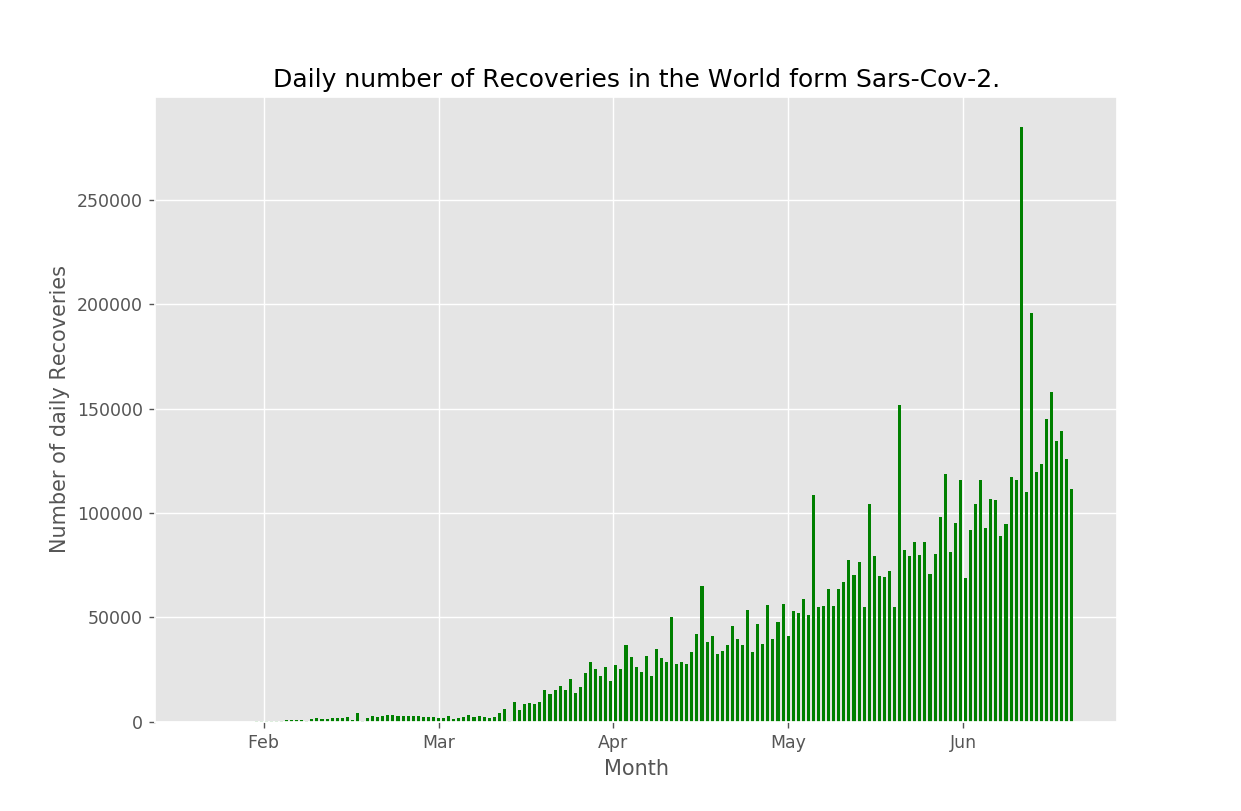

[]

In [71]:
plt.bar(recovery.index, recovery.values,color = 'green', width = 0.6)
plt.xticks(np.linspace(-22,tot.shape[0]+12,7),tick_labels)
plt.xlabel("Month")
plt.ylabel("Number of daily Recoveries")
plt.title("Daily number of Recoveries in the World form Sars-Cov-2.")
plt.plot()

### New Recoveries Have increased almost linearly over the months.

<IPython.core.display.Javascript object>


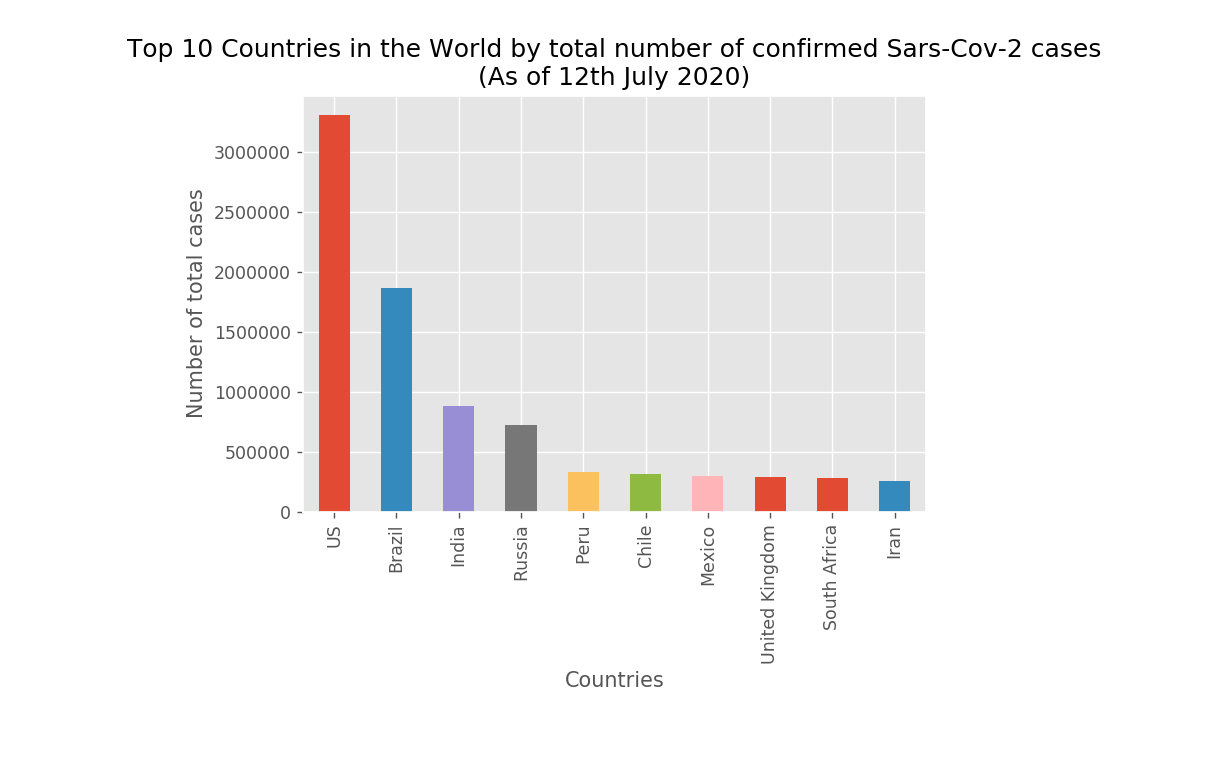

In [87]:
df.groupby("Country_Region").max()["Total_Confirmed_Cases"].sort_values(ascending = False).head(10).plot(kind = "bar")
plt.xlabel("Countries")
plt.ylabel("Number of total cases")
plt.title("Top 10 Countries in the World by total number of confirmed Sars-Cov-2 cases\n(As of 12th July 2020)")
plt.tight_layout()
plt.show()

### US continues to be the at the top of the list with over 3 million reported cases.It is followed by Brazil and India. 

<IPython.core.display.Javascript object>


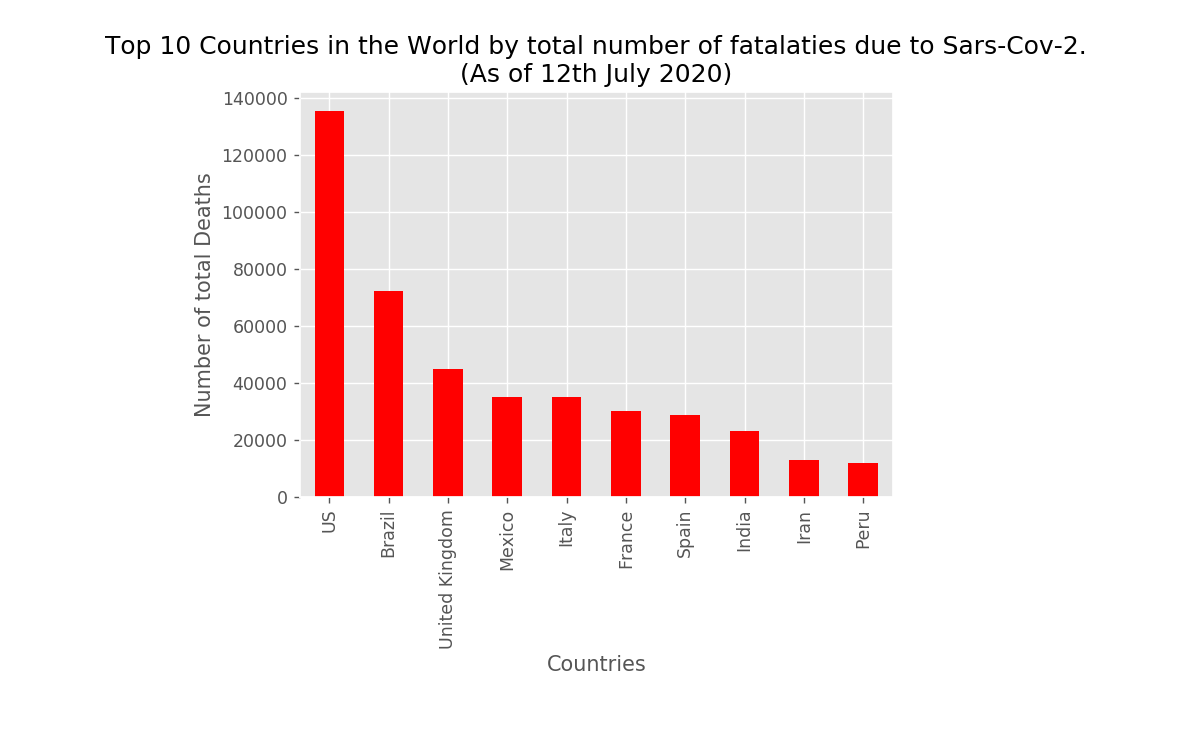

In [88]:
df.groupby("Country_Region").max()["Total_Fatalities"].sort_values(ascending = False).head(10).plot(kind = "bar", color = 'red')
plt.xlabel("Countries")
plt.ylabel("Number of total Deaths")
plt.title("Top 10 Countries in the World by total number of fatalaties due to Sars-Cov-2.\n(As of 12th July 2020)")
plt.tight_layout()
plt.show()

### USA reported the highest fatality count in the world followed by brazil and UK. Russia has lower mortality rate compared to other countries which keeps it away from this list.

In [111]:
cpm = df.groupby("Country_Region").max()[["Total_Confirmed_Cases","Population"]]

In [112]:
cpm.head()

,Total_Confirmed_Cases,Population
Country_Region,,
Afghanistan,34451,37172386
Albania,3454,2866376
Algeria,19195,42228429
Andorra,855,77006
Angola,506,30809762


In [113]:
cpm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
Total_Confirmed_Cases    188 non-null int64
Population               188 non-null int64
dtypes: int64(2)
memory usage: 4.4+ KB


In [115]:
cpm = cpm[cpm["Population"]>4000000]
cpm["Per_million"] = (cpm["Total_Confirmed_Cases"]*1000000)/cpm["Population"]

In [116]:
cpm["Per_million"]=cpm["Per_million"].astype(int)

In [117]:
cpm=cpm.sort_values("Per_million", ascending = False).head(10)["Per_million"]

In [118]:
a= np.array(cpm)

<IPython.core.display.Javascript object>


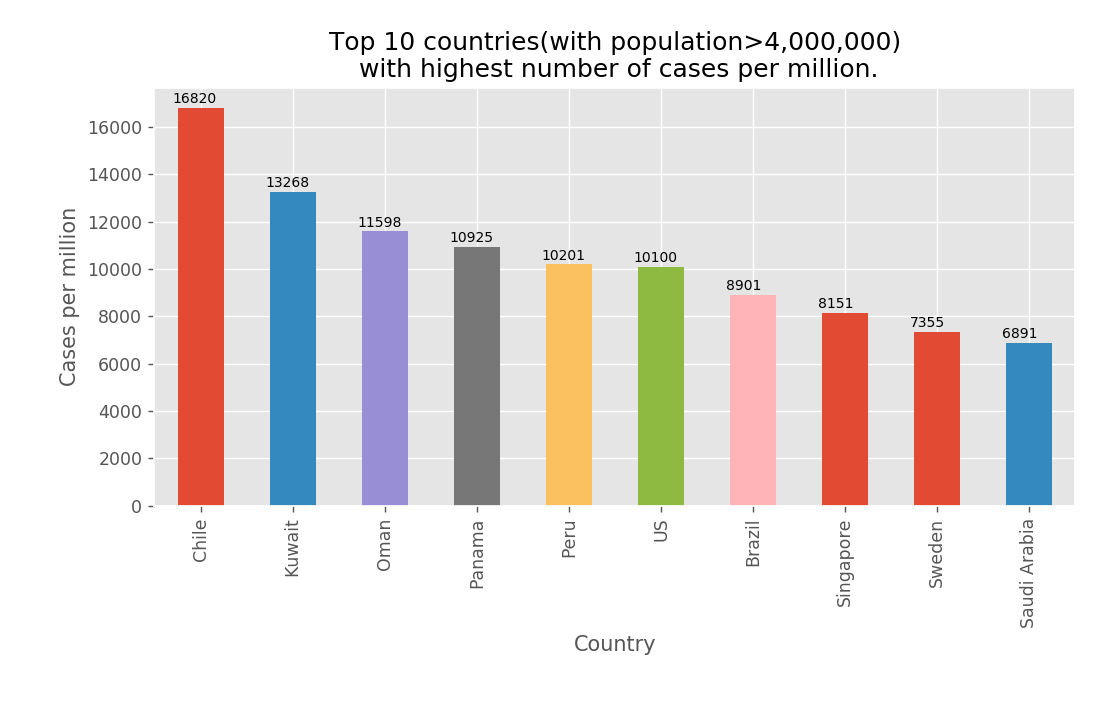

In [124]:
cpm.plot(kind = "bar")
plt.xlabel("Country")
plt.ylabel("Cases per million")
plt.title("Top 10 countries(with population>4,000,000)\n with highest number of cases per million.")
for i, v in enumerate(a):
    plt.text(i-.3, v+200, v, fontsize = 8)
plt.tight_layout()
plt.show()

## Conidering Countries with over 4 million population we observe that Chile has the highest cases per million, followed by Kuwait, Oman and Panama.

In [12]:
%matplotlib notebook
plt.style.use("ggplot")

In [26]:
us = df[df["Country_Region"]=="US"]
ind = df[df["Country_Region"]=="India"]
bra = df[df["Country_Region"]=="Brazil"]

<IPython.core.display.Javascript object>


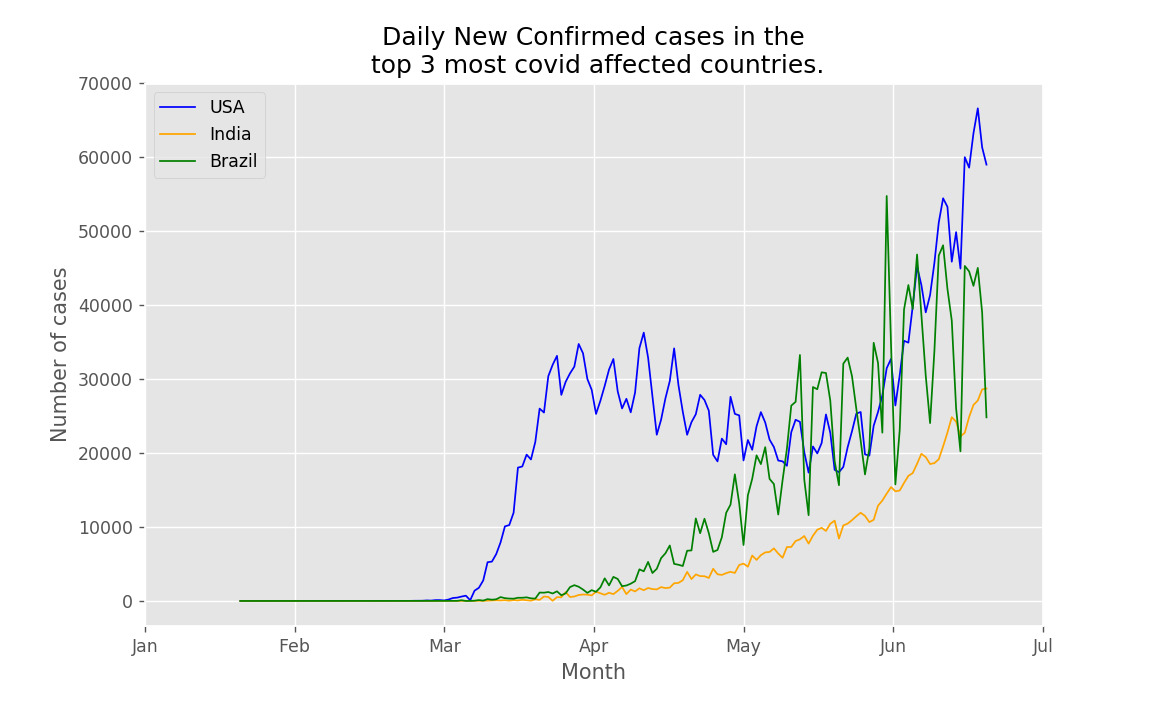

In [33]:
plt.plot(us["Date"], us["New_Confirmed_Cases"], linewidth = 1, color = "blue", label = "USA")
plt.plot(ind["Date"], ind["New_Confirmed_Cases"], linewidth = 1, color = "orange", label= "India")
plt.plot(bra["Date"], bra["New_Confirmed_Cases"], linewidth = 1, color = "green", label = "Brazil")
plt.xticks(np.linspace(-22,us.shape[0]+12,7),tick_labels)
plt.xlabel("Month")
plt.ylabel("Number of cases")
plt.title("Daily New Confirmed cases in the\n top 3 most covid affected countries.")
plt.legend()
plt.show()

### In USA daily cases of Covid-19 started increasing exponentially from march, which started falling after april, and it fell to below 20,000 cases by end of May. Cases again grew rapidly in the month of June ,due to the huge number of protests that occured all across the country. Currently, the number of daily cases stands at around 60,000 in USA, which is highest among any country.
### Brazil shows an overall steady growth of reported cases across the months of April, May and June, with daily fluctuations.Note that in betwen May and June, daily cases were sometimes even greater than that of US.
### In India cases are growing exponentially , which started around March-April. Number of cases are rising every day. 

<IPython.core.display.Javascript object>


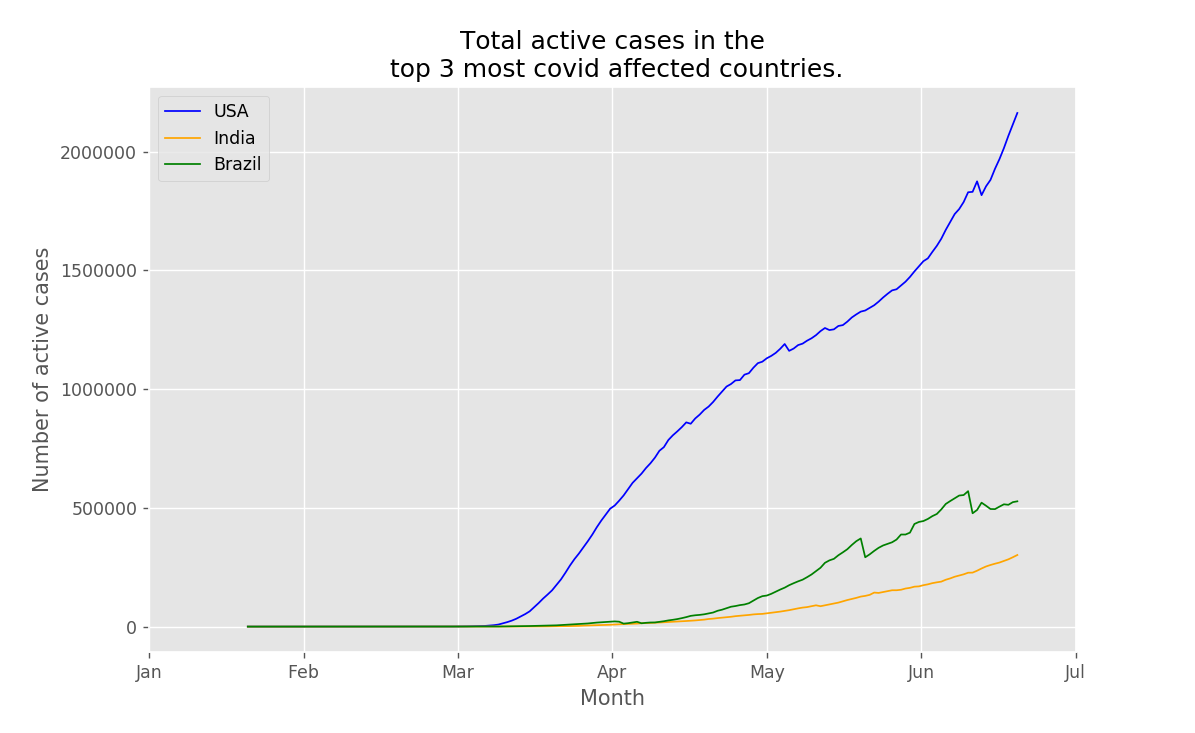

In [35]:
plt.plot(us["Date"], us["Remaining_Confirmed_Cases"], linewidth = 1, color = "blue", label = "USA")
plt.plot(ind["Date"], ind["Remaining_Confirmed_Cases"], linewidth = 1, color = "orange", label= "India")
plt.plot(bra["Date"], bra["Remaining_Confirmed_Cases"], linewidth = 1, color = "green", label = "Brazil")
plt.xticks(np.linspace(-22,us.shape[0]+12,7),tick_labels)
plt.xlabel("Month")
plt.ylabel("Number of active cases")
plt.title("Total active cases in the\n top 3 most covid affected countries.")
plt.legend()
plt.show()

### Total active cases are very high in USA compared to Brazil and India.

In [44]:
uk = df[df["Country_Region"]=="United Kingdom"]
sp = df[df["Country_Region"]=="Spain"]
it = df[df["Country_Region"]=="Italy"]

In [47]:
uk = uk[uk["New_Confirmed_Cases"]>=0]
sp = sp[sp["New_Confirmed_Cases"]>=0]
it = it[it["New_Confirmed_Cases"]>=0]

<IPython.core.display.Javascript object>


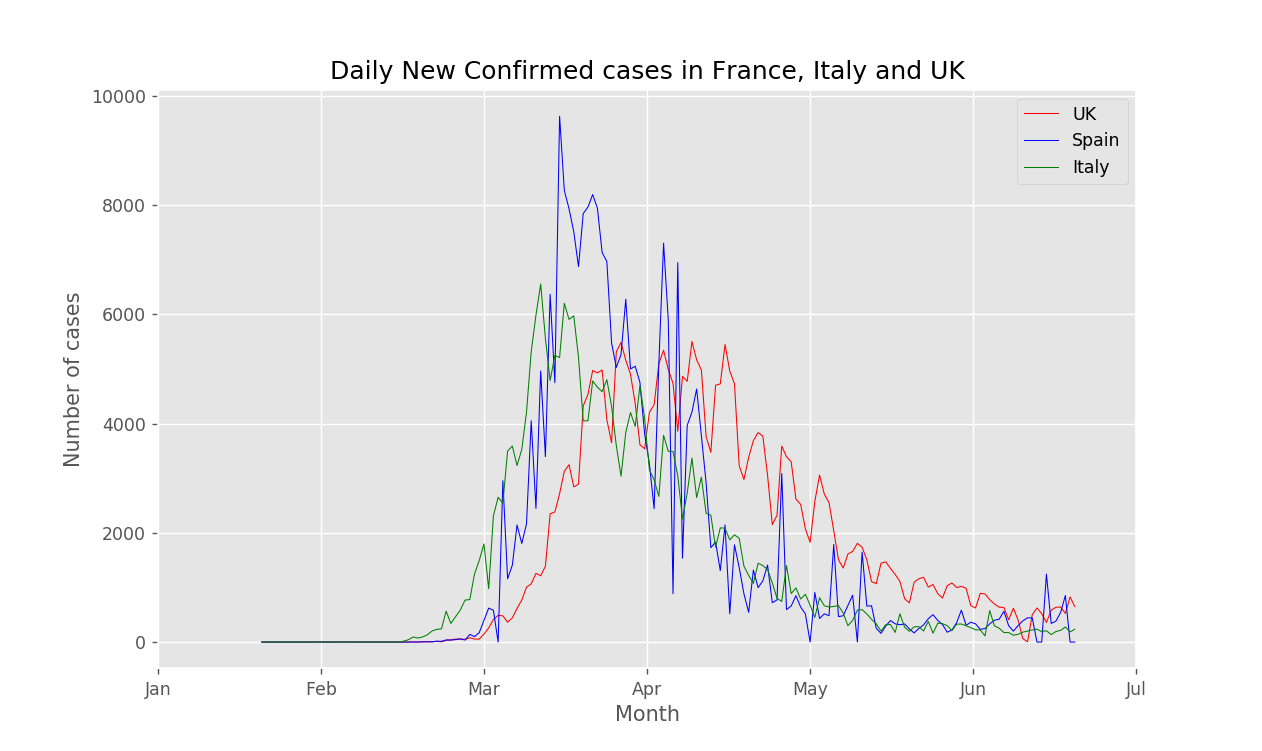

In [49]:
plt.plot(uk["Date"], uk["New_Confirmed_Cases"], linewidth = 0.6, color = "red", label = "UK")
plt.plot(sp["Date"], sp["New_Confirmed_Cases"], linewidth = 0.6, color = "blue", label= "Spain")
plt.plot(it["Date"], it["New_Confirmed_Cases"], linewidth = 0.6, color = "green", label = "Italy")
plt.xticks(np.linspace(-22,us.shape[0]+12,7),tick_labels)
plt.xlabel("Month")
plt.ylabel("Number of cases")
plt.title("Daily New Confirmed cases in France, Italy and UK")
plt.legend()
plt.show()

### Italy, Spain and UK were among the most infected countries a few month ago, when daily number of new registered cases made records everyday. As the curve shows a steady decline in April to June,  it will not be incorrect to say that, The lockdowns and the frequent tests that were performed during the outbreak of the pandemic in Italy, Spain and UK, have actually been successfull in containing the spread of this deadly virus.

In [33]:
recovery = df.groupby("Country_Region").max()[["Total_Confirmed_Cases", "Total_Recovered_Cases"]]

In [34]:
recovery = recovery.reset_index()

In [35]:
recovery.sort_values("Total_Confirmed_Cases", ascending = False, inplace = True)

In [36]:
recovery = recovery[recovery["Country_Region"]!="United Kingdom"]

In [37]:
recovery["RR"] =(recovery["Total_Recovered_Cases"]/recovery["Total_Confirmed_Cases"])*100
recovery.head()

,Country_Region,Total_Confirmed_Cases,Total_Recovered_Cases,RR
174,US,3304942,1006326,30.449127
23,Brazil,1864681,1264843,67.831602
79,India,878254,553471,63.019468
140,Russia,726036,500208,68.895757
134,Peru,326326,217111,66.531934


In [56]:
a = np.array(recovery["RR"])

In [39]:
recovery = recovery.head(15)

<IPython.core.display.Javascript object>


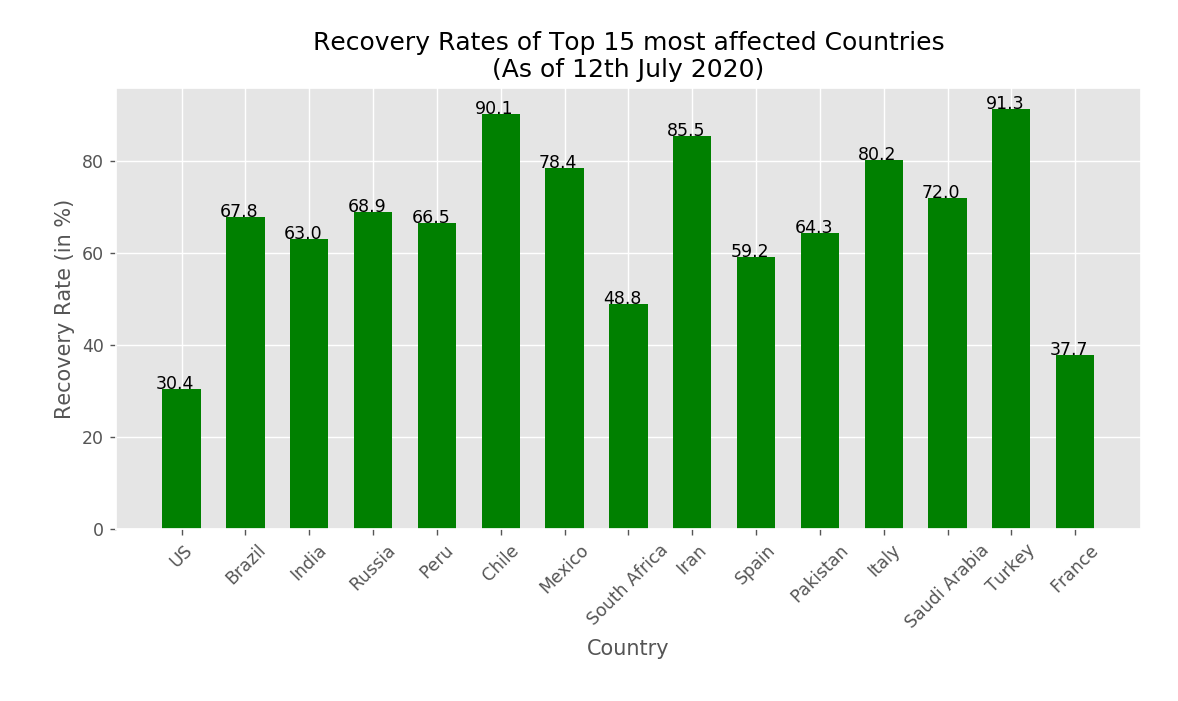

In [57]:
plt.bar(recovery["Country_Region"], recovery["RR"],color = "green", width = 0.6)
for i,v in enumerate(a):
    plt.text(i-.4,v,round(a[i],1))
plt.xticks(rotation =45)
plt.xlabel("Country")
plt.ylabel("Recovery Rate (in %)")
plt.title("Recovery Rates of Top 15 most affected Countries\n(As of 12th July 2020)")
plt.tight_layout()
plt.show()    

### The Recovery rate of USA is lowest amongst all the countries in top 15.
### Turkey and Chile currently has the highest recovery rates among these countries.
### UK is in top 15 most affected countries, but due to unavailability of sufficient data, it coudn't be included in this analysis.

In [70]:
mortality = df.groupby("Country_Region").max()[["Total_Confirmed_Cases", "Total_Fatalities"]]

In [71]:
mortality.sort_values("Total_Confirmed_Cases", ascending = False, inplace =True)

In [72]:
mortality["MR"] = (mortality["Total_Fatalities"]/mortality["Total_Confirmed_Cases"])*100

In [73]:
mortality = mortality.head(16)

In [74]:
b= np.array(mortality["MR"])

<IPython.core.display.Javascript object>


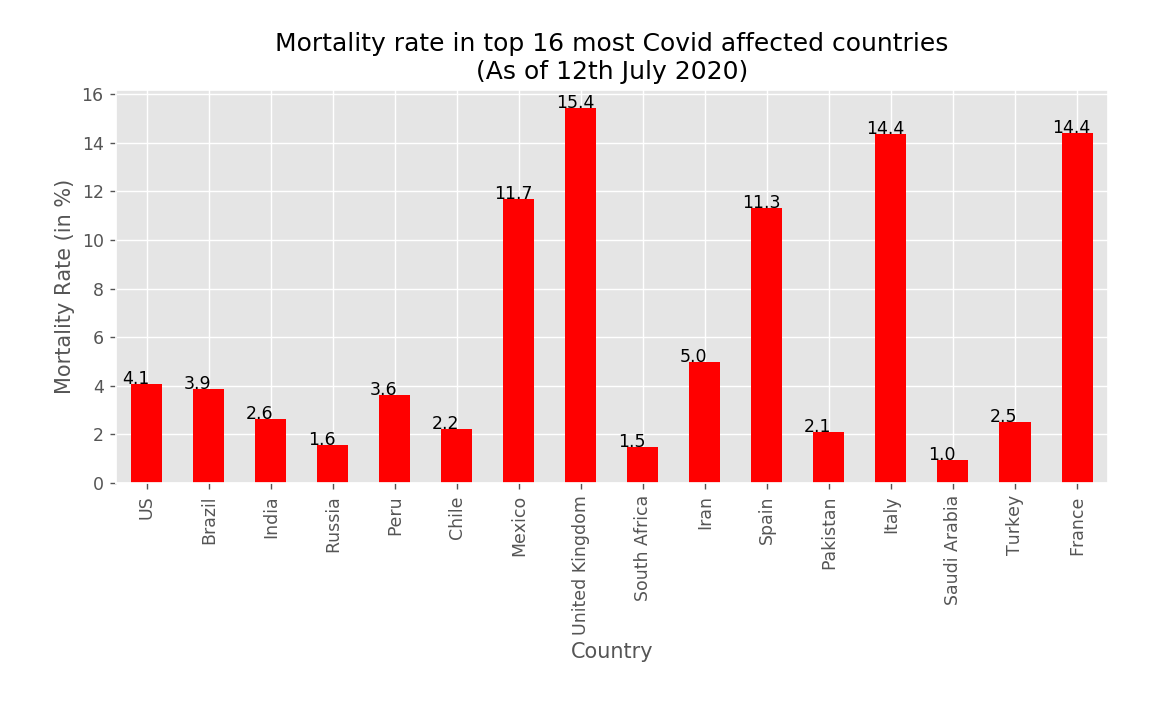

In [78]:
mortality["MR"].plot(kind = "bar", color= "red")
for i,v in enumerate(b):
    plt.text(i-.4,v,round(b[i],1))
plt.xlabel("Country")
plt.ylabel("Mortality Rate (in %)")
plt.title("Mortality rate in top 16 most Covid affected countries\n(As of 12th July 2020)")
plt.tight_layout()
plt.show()

### It is observed that the European Countries like UK, Spain,Italy and France has significantly high mortality rate than the other countries. 
### Saudi Arabia, South Africa and Russia on the other hand has the lowest mortality rate among all the top countries, which is below 2%.